# Data Analysis and Data Science
## Be curious about the data 

By: NOME
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>


**Student Name**: 

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [5]:
## Define variable with file name

fn = "breast_cancer_metametric.tsv"

In [8]:
## Read ans save data into variable as a dataframe

data = pd.read_table(fn)

1. How many variables and samples are there in your dataset?

## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

In [11]:
data.shape

(1104, 14)

In [15]:
smp = len(data)
print("There are", smp, "samples a.k.a. patients")

There are 1104 samples a.k.a. patients


In [18]:
var = len(data.columns)
print("There are", var, "samples a.k.a. patients")

There are 14 samples a.k.a. patients


***
2. How many age groups are considered?

In [21]:
data.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


In [24]:
print("Nb. of age groups:", data.loc[:, 'AGE_GROUP'].nunique())


Nb. of age groups: 6


***
3. What is the mean overall survival (in month)?

In [37]:
MOS = data['OS_MONTHS'].mean()


print("The mean overall survival is", MOS, "months")

The mean overall survival is 126.10326086947464 months


***
4. What is the highest mutation count?

In [43]:
max_mutat = data['MUTATION_COUNT'].max()
print("The highest mutational count is", max_mutat, "mutations")

The highest mutational count is 46.0 mutations


***
5. How large is the smallest tumor?

In [48]:
min_size = data['TUMOR_SIZE'].min()
print("The minimum tumor size is", min_size," cm")

The minimum tumor size is 1.0  cm


***
6. What are the grade considered in the dataset?

In [53]:
print("Grades:", data.loc[:, 'GRADE'].unique())

Grades: [3. 2. 1.]


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [57]:
med_NPI = data.loc[:, 'NPI'].median()
print("Median NPI: ", med_NPI)

Median NPI:  4.046


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [64]:
print("CHEMOTHERAPY:", data.loc[:, 'CHEMOTHERAPY'].unique())
print("HORMONE_THERAPY:", data.loc[:, 'HORMONE_THERAPY'].unique())
print("RADIO_THERAPY:", data.loc[:, 'RADIO_THERAPY'].unique())
print("BREAST_SURGERY:", data.loc[:, 'BREAST_SURGERY'].unique())

print("These values probably represent True(1) or False(0).")

CHEMOTHERAPY: [1. 0.]
HORMONE_THERAPY: [1. 0.]
RADIO_THERAPY: [1. 0.]
BREAST_SURGERY: [0. 1.]
These values probably represent True(1) or False(0).


***
10. How many patients in the dataset have had breast surgery?

In [98]:
breast_p = (data.loc[data.BREAST_SURGERY == 1.0])
print(len(breast_p), "patients have had breast surgery")

468 patients have had breast surgery


## Visualize the data [30 pts pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [95]:
## Import the seaborn library
import seaborn as sns

In [100]:
data.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


In [ ]:
## Set global theme parameters
sns.set(rc={'figure.figsize':(5, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

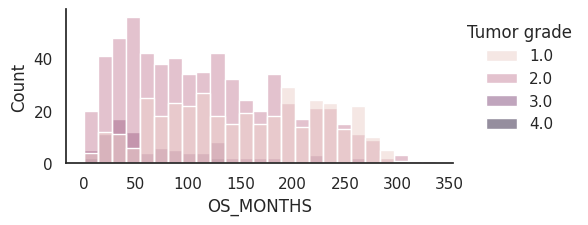

In [104]:
### Figure

### We want the distribution to be stage-specific
p = sns.histplot(data, x="OS_MONTHS", bins=25, hue="TUMOR_STAGE")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title='Tumor grade', frameon=False)
sns.despine()

In [113]:
### Interpretation

print("Lower stage tumors tend to have longer overall survival.")

Lower stage tumors tend to have longer overall survival.


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [115]:
data.head(25)

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0
5,1.0,1.0,1.0,0.0,2.0,2.0,3.0,1.0,5.0,5.070,143.133333,35.0,2.0,50.0
6,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,3.030,201.466667,15.0,1.0,40.0
7,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,3.0,3.024,199.133333,12.0,1.0,40.0
8,1.0,0.0,1.0,1.0,2.0,0.0,3.0,1.0,6.0,4.050,65.866667,25.0,2.0,40.0
9,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,4.038,109.833333,19.0,2.0,80.0


In [ ]:
### Hypothesis



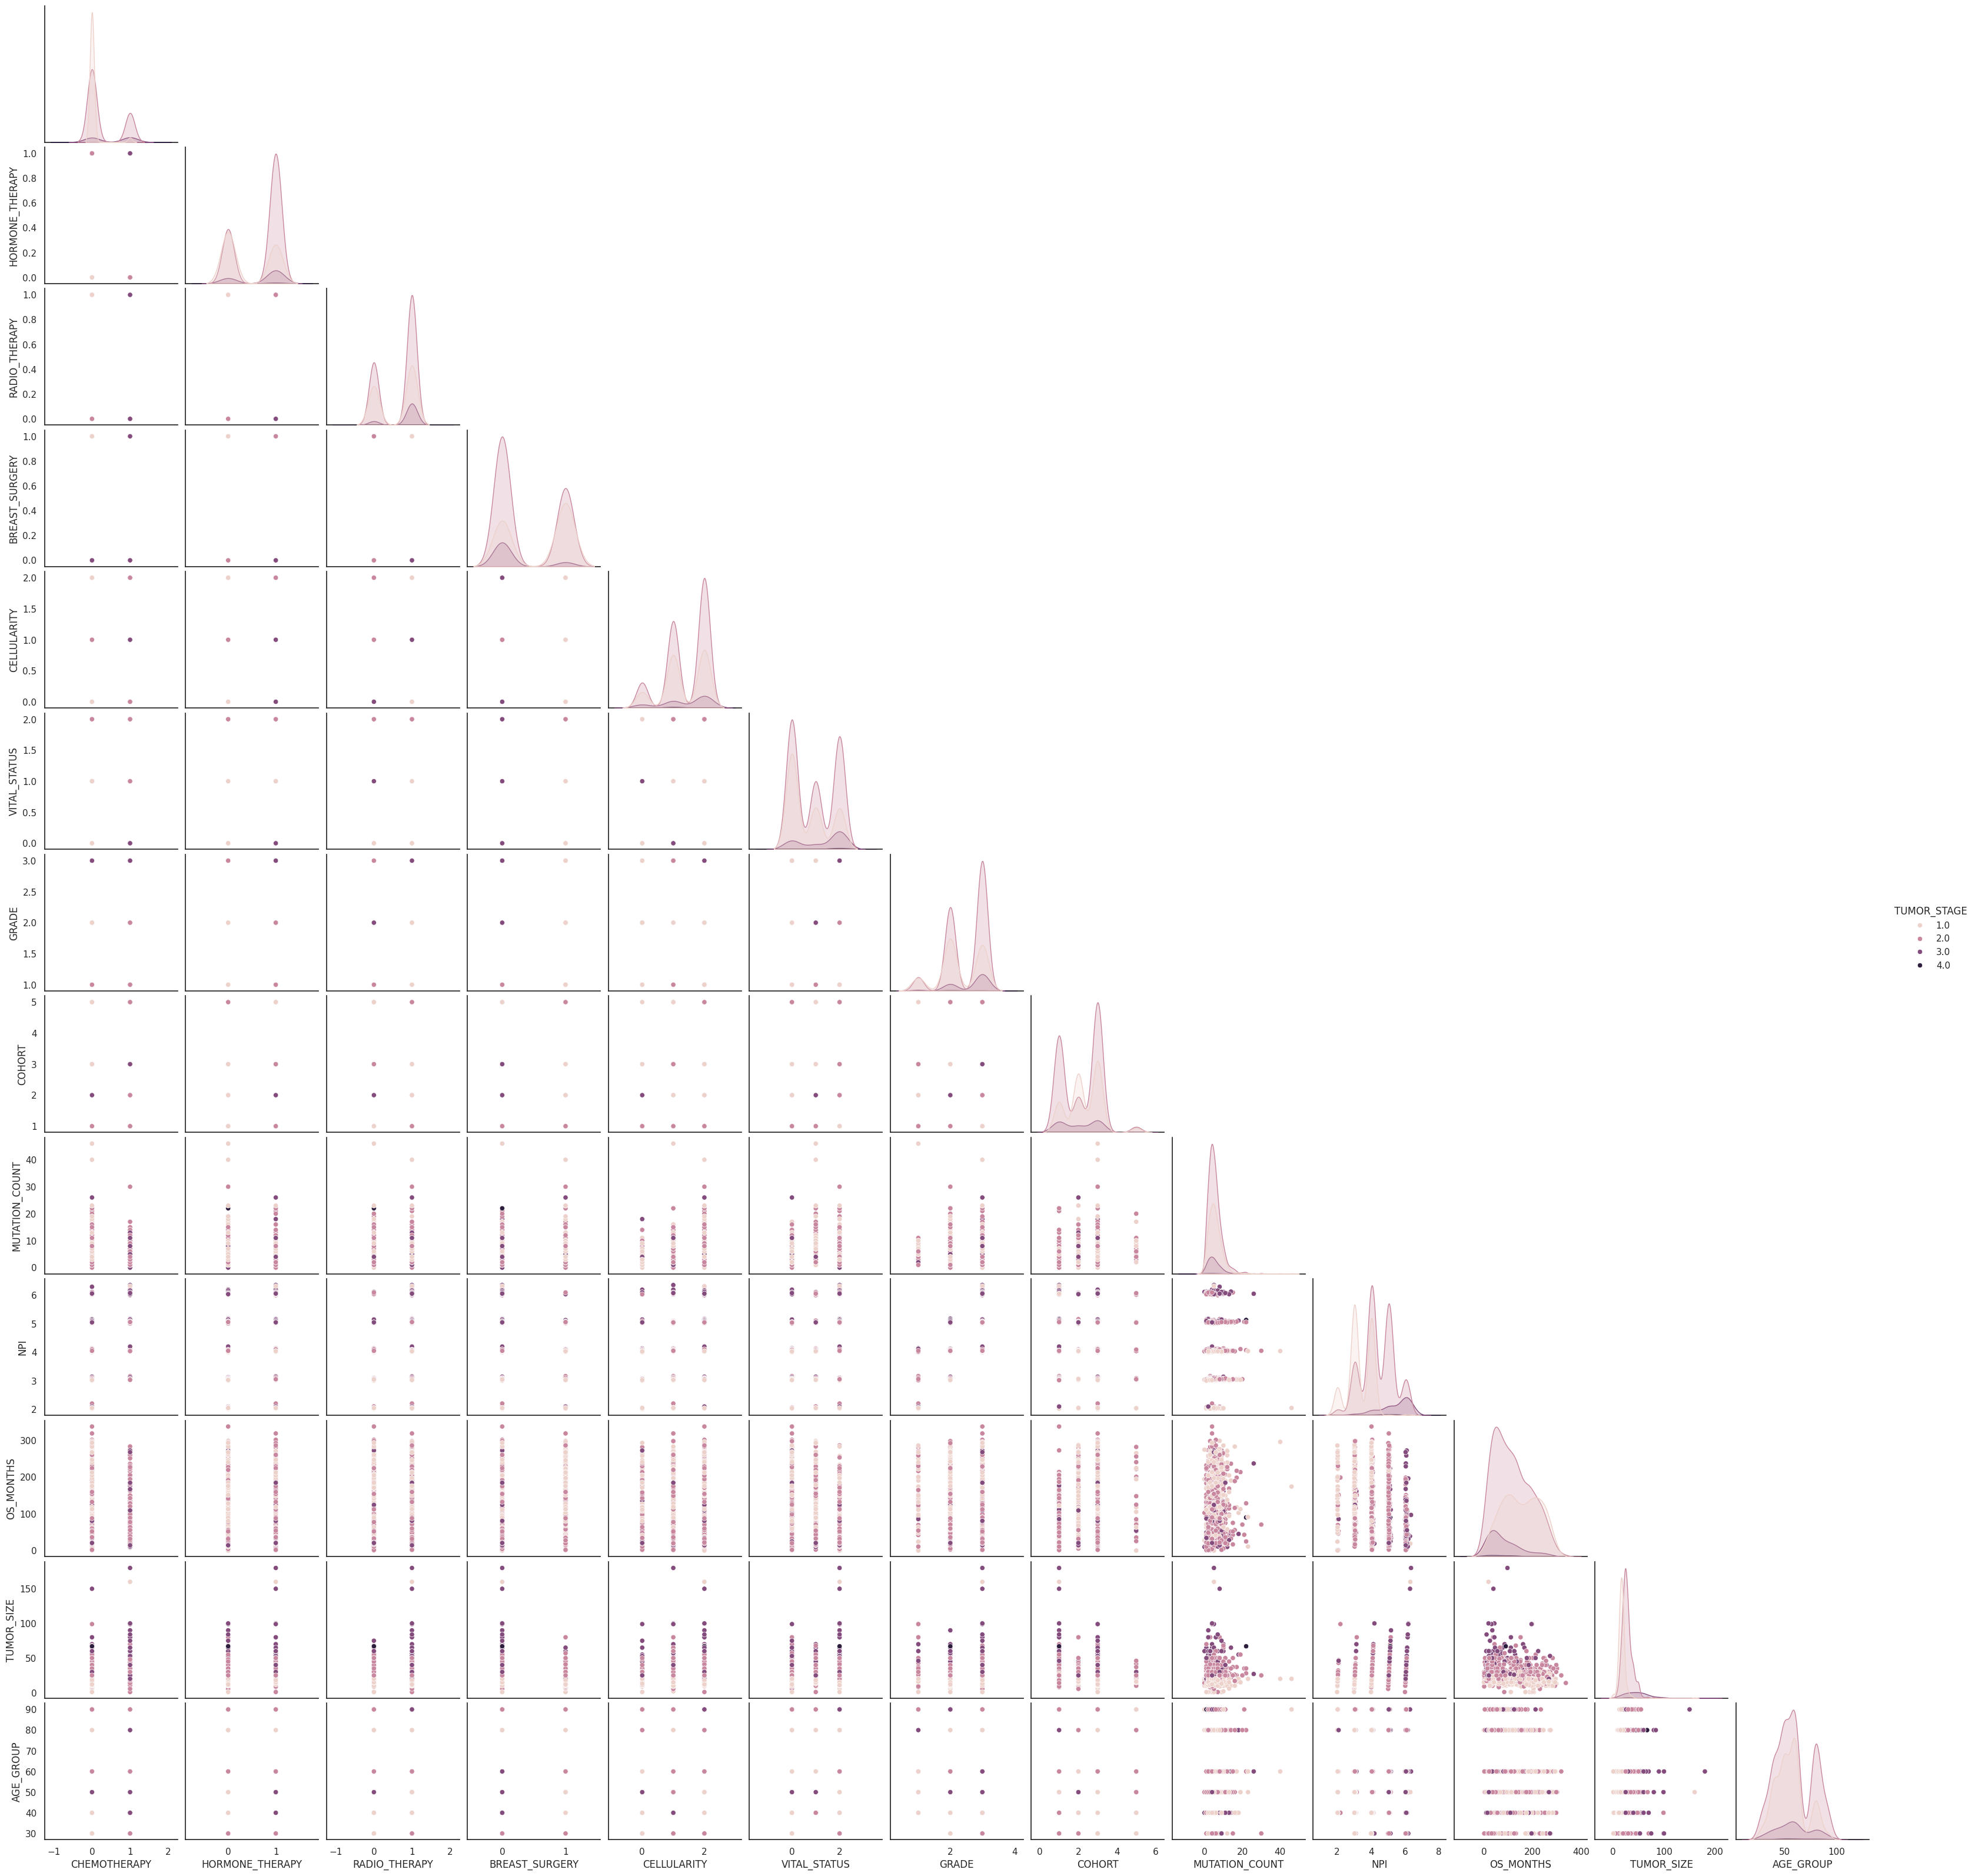

In [116]:
### Figure

### Plot all pairwise relationships between all numeric variables
### Color samples based on the results
### The diagonal should contain histogram

sns.pairplot(data, corner=True, hue='TUMOR_STAGE')
sns.despine()

In [ ]:
### Interpretation